In [1]:
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_covtype
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import r2_score

## Ejercicio 1
Imprime por pantalla tu nombre, apellido y email

In [2]:
# Resuelve en esta celda el ejercicio 1
nombre = "Iván" 
apellido = "Ortiz Martín"
email = "ivtransgruasortiz@gmail.com"
print(f"Nombre: {nombre} \nApellidos: {apellido} \nemail: {email}")

Nombre: Iván 
Apellidos: Ortiz Martín 
email: ivtransgruasortiz@gmail.com


## Ejercicio 2

### Ejercicio 2.1
Muestra los primeros registros del siguiente conjunto de datos

In [3]:
# Cargar el dataset "titanic" de seaborn
df = sns.load_dataset("titanic")

# Resolver aqui el ejercicio 2.1
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Ejercicio 2.2
Muestra una descripción general del conjunto de datos cargado en el ejercicio 2.1

In [4]:
# Resuelve aqui el ejercicio 2.2
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Ejercicio 2.3
Elimina los datos de la columna "deck" y sustituye los datos nulos para la columno "age" con el valor medio. Luego muestra el dataframe:

In [5]:
# Resuelve aqui el ejercicio 2.3
df.drop('deck', axis=1, inplace=True)
df['age'] = df['age'].fillna(df['age'].mean())
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


#### Ejercicio 2.4
Crea un gráfico de tipo histograma que represente la distribución de las edades de los pasajeros. Usa **matplotlib** o **seaborn** como herramientas de visualización

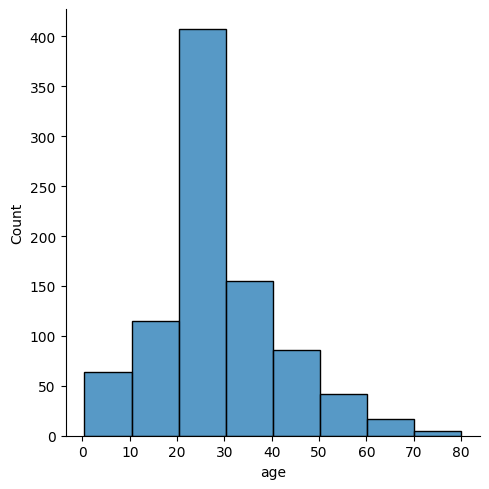

In [6]:
# Resuelve aqui el ejercicio 2.4
sns.displot(df['age'], bins=8)  # Utilizo bins=8 porque muestra unos rangos de edad fácilmente interpretables

#### Ejercicio 2.5
Crea un gráfico circular que represente la distribución por género de los pasajeros. Usa **matplotlib** o **seaborn** como herramientas de visualización

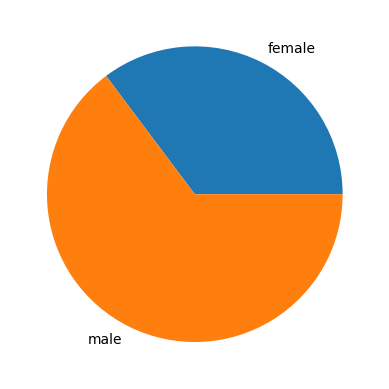

In [7]:
# Resuelve aqui el ejercicio 2.5
dict_sex = df.groupby("sex")["sex"].count().to_dict()
plt.pie(x=dict_sex.values(), labels=dict_sex.keys())
plt.show()

## Ejercicio 3

#### Ejercicio 3.1
Separa el dataset en dos variables, 'x' e 'y'.
 - La variable 'x' debe incluir las columnas 'depth', 'table', 'price', 'x', 'y' y 'z'.
 - La variable 'y' debe incluir la columna 'carat'.

In [8]:
# Carga el dataset "diamonds" de seaborn
diamantes = sns.load_dataset("diamonds")
diamantes.head()

# Resuelve aqui el ejercicio 3.1
x = diamantes[['depth', 'table', 'price', 'x', 'y', 'z']]
y = diamantes[['carat']]

#### Ejercicio 3.2
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test

In [9]:
# Resuelve aqui el ejercicio 3.2
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

#### Ejercicio 3.3
Crea un modelo de regresión lineal y entrenalo con los conjuntos de datos separados en el ejercicio anterior. La variable objetivo corresponde a la columna 'carat'

In [10]:
# Resuelve aqui el ejercicio 3.3
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

#### Ejercicio 3.4
Utiliza el modelo entrenado en el apartado anterior para predecir los valores de la columna 'carat'

In [11]:
# Resuelve aqui el ejercicio 3.3
y_pred = lrm.predict(X_test)
print(y_pred)

# Descomentar lo siguiente si se quiere crear una nueva columna con las predicciones del modelo sobre la columna "carat"
#diamantes["carat_pred"] = lrm.predict(x)
#diamantes
#r2_score(y_test, y_pred)  # Descomentar para evaluar el modelo

[[0.14346117]
 [0.61704432]
 [0.40518998]
 ...
 [0.27495771]
 [0.12391246]
 [0.74458284]]


### Ejercicio 4

#### Ejercicio 4.1
Muestra un resumen estadístico de los datos numéricos del dataset provisto

In [12]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# ALTERNATIVA CON OTRO DATASET 
# Cargar el dataset "titanic" de seaborn
# df = sns.load_dataset("titanic")

# Resuelve aqui el ejercicio 4.1
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Ejercicio 4.2
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test

In [13]:
# Resuelve aqui el ejercicio 4.2
scaler = StandardScaler() # Escalamos los datos porque hay mucha diferencia en la desviación estándar entre ellos
X_sc = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.4, random_state=42)

#### Ejercicio 4.3
Crea un modelo de regresión logística y entrenalo con los conjuntos de datos separados en el ejercicio anterior. 

In [14]:
# Resuelve aqui el ejercicio 4.3
logm = LogisticRegression(max_iter=4000)
logm.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

#### Ejercicio 4.4
Utiliza el modelo entrenado en el apartado anterior para predecir los valores de la variable objetivo. 

In [15]:
# Resuelve aqui el ejercicio 4.4
y_pred = logm.predict(X_test)
print(y_pred)

# Descomentar lo siguiente para evaluar el modelo
#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 1 0 1]


### Ejercicio 5

#### Ejercicio 5.1
Muestra los primeros registros del siguiente conjunto de datos

In [16]:
df = sns.load_dataset("penguins")

# Resuelve aqui el ejercicio 5.1
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


#### Ejercicio 5.2
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test. La variable objetivo corresponde a la columna "species"

In [17]:
# Resuelve aquí el ejericio 5.2

df['bill_length_mm'] = df['bill_length_mm'].fillna(df['bill_length_mm'].mean())
df['bill_depth_mm'] = df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())

# Convertimos variables categóricas nominales de string a categóricas numéricas con labelencoder
df['island_enc'] = LabelEncoder().fit_transform(df['island'])
df['sex_enc'] = LabelEncoder().fit_transform(df['sex'])

X = df.drop(['species', 'island', 'sex'], axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

#### Ejercicio 5.3
Elige un modelo de clasificación entre los siguientes: 
 - Decision tree (Árbol de decisión)
 - Random forest
 - SVM (Support Vector Machine)
 
Entrenalo con los conjuntos de datos separados en el ejercicio anterior. 

In [18]:
# Resuelve aquí el ejericio 5.3
rfmodel = RandomForestClassifier(n_estimators=100, random_state=42)
rfmodel.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Ejercicio 5.4
Utiliza el modelo entrenado en el apartado anterior para predecir los valores de la variable objetivo. 

In [19]:
# Resuelve aquí el ejericio 5.4
y_pred = rfmodel.predict(X_test)
print(y_pred)

# Descomentar lo siguiente para ver la evaluación del modelo
#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

['Chinstrap' 'Chinstrap' 'Gentoo' 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo'
 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Chinstrap' 'Chinstrap' 'Adelie' 'Chinstrap' 'Adelie'
 'Chinstrap' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie'
 'Gentoo' 'Chinstrap' 'Adelie' 'Chinstrap' 'Gentoo' 'Gentoo' 'Gentoo'
 'Adelie' 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Adelie' 'Chinstrap'
 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Chinstrap' 'Adelie'
 'Chinstrap' 'Chinstrap' 'Gentoo' 'Chinstrap' 'Adelie' 'Gentoo' 'Adelie'
 'Gentoo' 'Chinstrap' 'Chinstrap' 'Adelie' 'Adelie' 'Adelie' 'Gentoo'
 'Adelie' 'Adelie' 'Gentoo' 'Gentoo' 'Gentoo' 'Adelie' 'Adelie' 'Adelie'
 'Gentoo' 'Adelie' 'Gentoo' 'Gentoo' 'Adelie' 'Chinstrap' 'Chinstrap'
 'Adelie' 'Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Gentoo' 'Gentoo'
 'Adelie' 'Gentoo' 'Chinstrap' 'Adelie' 'Chinstrap' 'Gentoo' 'Adelie'
 'Adelie' 'Adelie' '

### Ejercicio 6

#### Ejercicio 6.1
Muestra un resumen estadístico de los datos numéricos del dataset provisto

In [20]:
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
df = pd.read_csv(url, header=None)
df.columns = [
   "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
    "Rings",
]
#df = df.drop("Sex", axis=1)

# Resuelve aqui el ejercicio 6.1
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


#### Ejercicio 6.2
Separa el conjunto de datos en variables 'x' e 'y', donde la 'y' corresponde a la variable objetivo 'Sex'.

In [21]:
# Resuelve aqui el ejercicio 6.2
columns = df.columns
columns = columns.drop("Sex")
scaler = StandardScaler()
x = df[columns]
x_sc = scaler.fit_transform(x)  # Escalado de datos
y = df["Sex"].values.ravel()  # aplana los datos de la varible a predecir

#### Ejercicio 6.3
Separa el dataset provisto en conjunto de entrenamiento y de test, dando un 40% de los datos al conjunto de test. 

In [22]:
# Resuelve aquí el ejercicio 6.3
X_train, X_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.4, random_state=42)

#### Ejercicio 6.4
Crea un modelo de regresión logística y entrenalo con los conjuntos de datos separados en el ejercicio anterior. Utiliza el valor 3 para el parámetro 'n_neighbors'

In [23]:
# Resuelve aquí el ejercicio 6.4
print(df["Sex"].unique())
# Vamos a utilizar un algoritmo de clasificación KNN, mejor que uno logístico,
# ya que la variable objetivo puede tomar 3 valores, no es una clasificación binaria

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

['M' 'F' 'I']


KNeighborsClassifier(n_neighbors=3)

#### Ejercicio 6.5
Muestra la matriz de confusión resultante para la salida del ejercicio anterior

In [24]:
# Resuelve aquí el ejercicio 6.5
y_pred = knn_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[241  63 220]
 [ 90 366  99]
 [256  79 257]]
